In [247]:
import numpy as np
import matplotlib.pyplot as plt

In [248]:
x_train = np.array([1.0, 2.0])
y_train = np.array([20.0, 60.0])

## Computing Cost (loss)
The term 'cost' in this assignment might be a little confusing since the data is housing cost. Here, cost is a measure how well our model is predicting the target price of the house. The term 'price' is used for housing data.

The equation for cost with one variable is:
$$
J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{1}
$$ 
 
 
$$
f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{2}
$$
  
+ $f_{w,b}(x^{(i)})$ is our prediction for example $i$ using parameters $w,b$.  
+ $(f_{w,b}(x^{(i)}) -y^{(i)})^2$ is the squared difference between the target value and the prediction.   
+ These differences are summed over all the $m$ examples and divided by `2m` to produce the cost, $J(w,b)$.

**Note:** In this lab, the bias parameter $b$ is set to 0 to make visualization and understanding easier.

In this lab, i use ternary search to find the values of (w) that minimize the cost of function (1)

In [249]:
def compute_loss_value(x, y, w, b = 0):
    """
    Computes the total squared error (loss) between the predicted and target values

    Args: 
        x : Input feature values
        y : Actual target values
        w : Wieght parameter for the linear model

    Returns:
        float: the sum of squared differances between the predicted and target values
    """
    m = len(x)
    total_cost = 0
    for i in range(m):
        f_wb = w * x[i] + b
        total_cost += (f_wb - y[i]) ** 2 
    return total_cost

### Use ternary search to find W that minimizes the cost function (1)

In [250]:

def ternary_search(x, y): 
    """
    Find the value of the weight parameter w that minimizes the total cost between 
    predicted and actual target values using ternary search.

    Args:
        x : Input feature values.
        y : Actual target values.
        
    Returns:
        float: The value of w that minimizes the loss function.
    
    Designed by [Nghiem Quang Huy]
    """
    lo = -1000.0
    hi = 1000000.0
    mn_w = -1
    while hi - lo > 1e-10:
        m1 = (2*lo + hi) / 3.0
        m2 = (lo + 2*hi) / 3.0
        if compute_loss_value(x, y, m1) > compute_loss_value(x, y, m2):
            mn_w = m1
            lo = m1
        else:
            mn_w = m2
            hi = m2
    return mn_w

W = ternary_search(x_train, y_train)
W

27.99999995295154

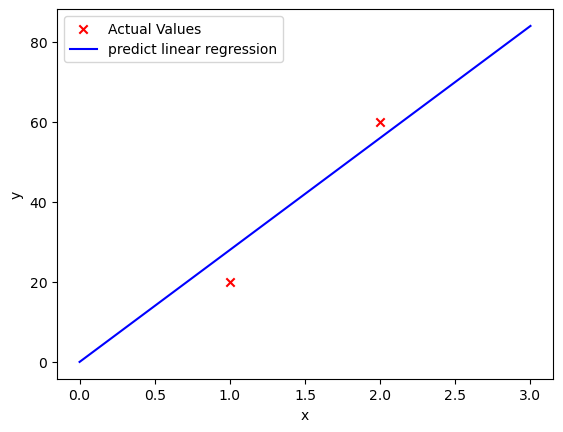

In [251]:
plt.scatter(x_train, y_train, marker='x', c='r', label='Actual Values')
x_line = np.linspace(0, 3, 10)
y_line = W * x_line
plt.plot(x_line, y_line, color='blue', label='predict linear regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

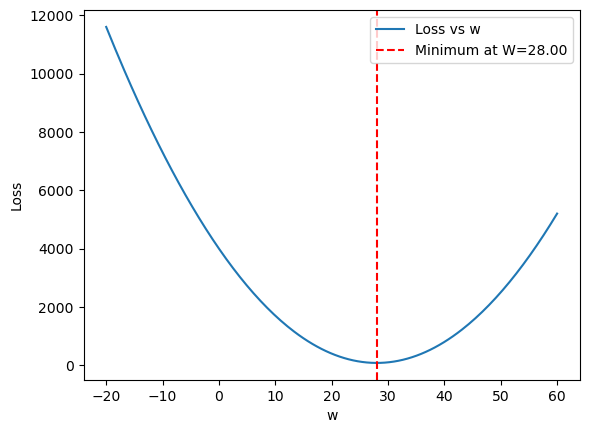

In [252]:
w_values = np.linspace(-20, 60, 200)
loss_values = [compute_loss_value(x_train, y_train, w) for w in w_values]

plt.plot(w_values, loss_values, label='Loss vs w')
plt.axvline(W, color='red', linestyle='--', label=f'Minimum at W={W:.2f}')
plt.xlabel('w')
plt.ylabel('Loss')
plt.legend()
plt.show()